In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns

fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# 01 나이 관련 데이터 분석

In [2]:
df = pd.read_excel('Data/연령대별_성별_운전면허소지.xls', header = 2)

In [3]:
license_age = []
license_age.append(df.iloc[6:16]['전국'].sum())
license_age.append(df.iloc[16:26]['전국'].sum())
license_age.append(df.iloc[26:36]['전국'].sum())
license_age.append(df.iloc[36:46]['전국'].sum())
license_age.append(df.iloc[46:56]['전국'].sum())
license_age.append(df.iloc[56:-1]['전국'].sum())

In [4]:
pd.DataFrame({'운전자수' : license_age}, index = ['21~30', '31~40', '41~50', '51~60' ,'61~70', '71세이상'])

,운전자수
21~30,5120679.0
31~40,6708182.0
41~50,7686898.0
51~60,7105515.0
61~70,3952198.0
71세이상,1510570.0


In [5]:
df = pd.read_excel('Data/가해자_연령대별_교통사고.xls', header = 1)
df = df.tail(28)
df

,가해운전자 연령구분,사고년도,합계,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
6,15-20세,사고건수,6439.0,393.0,379.0,530.0,532.0,634.0,598.0,608.0,581.0,557.0,594.0,579.0,454.0
7,15-20세,사망자수,93.0,10.0,6.0,13.0,10.0,8.0,5.0,6.0,3.0,6.0,9.0,11.0,6.0
8,15-20세,부상자수,9600.0,561.0,572.0,782.0,802.0,920.0,881.0,926.0,860.0,805.0,900.0,875.0,716.0
9,21-30세,사고건수,30631.0,2177.0,2012.0,2439.0,2548.0,2850.0,2551.0,2588.0,2741.0,2527.0,2883.0,2760.0,2555.0
10,21-30세,사망자수,376.0,31.0,30.0,19.0,29.0,35.0,27.0,23.0,30.0,35.0,44.0,35.0,38.0
11,21-30세,부상자수,47618.0,3273.0,3242.0,3786.0,3981.0,4489.0,3936.0,4011.0,4273.0,3996.0,4463.0,4254.0,3914.0
12,31-40세,사고건수,34978.0,2649.0,2343.0,2769.0,2946.0,3170.0,2855.0,2881.0,2983.0,3042.0,3165.0,3228.0,2947.0
13,31-40세,사망자수,429.0,31.0,35.0,35.0,42.0,37.0,35.0,27.0,24.0,39.0,40.0,35.0,49.0
14,31-40세,부상자수,52847.0,3949.0,3667.0,4229.0,4436.0,4863.0,4376.0,4247.0,4602.0,4632.0,4698.0,4761.0,4387.0
15,41-50세,사고건수,43769.0,3313.0,2871.0,3558.0,3673.0,3978.0,3573.0,3671.0,3672.0,3643.0,4069.0,3982.0,3766.0


In [6]:
x = [20, 30, 40, 50, 60, 70]
accident_age = []
accident_age.append(df.iloc[3]['합계'])
accident_age.append(df.iloc[6]['합계'])
accident_age.append(df.iloc[9]['합계'])
accident_age.append(df.iloc[12]['합계'])
accident_age.append(df.iloc[15]['합계'] + df.iloc[18]['합계'])
accident_age.append(df.iloc[21]['합계'])

death_age = []
death_age.append(df.iloc[4]['합계'])
death_age.append(df.iloc[7]['합계'])
death_age.append(df.iloc[10]['합계'])
death_age.append(df.iloc[13]['합계'])
death_age.append(df.iloc[16]['합계'] + df.iloc[19]['합계'])
death_age.append(df.iloc[22]['합계'])

injury_age = []
injury_age.append(df.iloc[5]['합계'])
injury_age.append(df.iloc[8]['합계'])
injury_age.append(df.iloc[11]['합계'])
injury_age.append(df.iloc[14]['합계'])
injury_age.append(df.iloc[17]['합계'] + df.iloc[18]['합계'])
injury_age.append(df.iloc[23]['합계'])

accident_rate = np.array(accident_age) / np.array(license_age)
death_rate = np.array(death_age) / (np.array(death_age) + np.array(injury_age))

In [7]:
pd.DataFrame({'사고율' : accident_rate, '사망률' : death_rate}, index = ['21~30', '31~40', '41~50', '51~60' ,'61~70', '71세이상'])

,사고율,사망률
21~30,0.005982,0.007834
31~40,0.005214,0.008052
41~50,0.005694,0.008848
51~60,0.007855,0.009420
61~70,0.009630,0.012681
71세이상,0.009947,0.021226


In [8]:
def LeastSquareMethod(X, Y):
    x_bar = sum(X) / len(X)
    y_bar = sum(Y) / len(Y)
    
    a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y,X))])
    a /= sum([(x - x_bar) ** 2 for x in X])
    b = y_bar - a * x_bar
    print('slope : ', a, 'intercept : ', b)
    
    line_x = np.arange(min(X), max(X), 0.01)
    line_y = a * line_x + b
    
    plt.plot(line_x, line_y, 'r-')
    

In [9]:
age_accident_df = pd.DataFrame({'age' : x, 'accident_rate' : accident_rate})

m1 = ols ( 'age~accident_rate', data=age_accident_df).fit()
m1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     19.54
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0115
Time:                        03:55:34   Log-Likelihood:                -20.223
No. Observations:                   6   AIC:                             44.45
Df Residuals:                       4   BIC:                             44.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -15.9087     14.221     -1.119      0.326     -55.393      23.575
accident_rate  8245.3200   1865.233      4.421      0.012    3066.603    1.34e+04
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.481
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.651
Skew:                          -0.789   Prob(JB):                        0.722
Kurtosis:                       2.665   Cond. No.                         530.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

slope :  0.00010067339556354842 intercept :  0.0028567598225339432


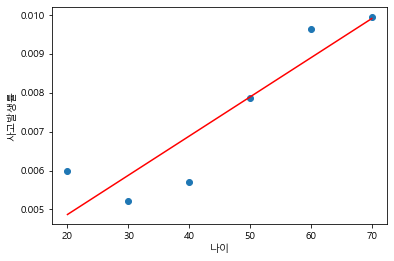

In [10]:
plt.scatter(x, accident_rate)
plt.xlabel("나이")
plt.ylabel("사고발생률")
LeastSquareMethod(x, accident_rate)

In [11]:
age_death_df = pd.DataFrame({'age' : x, 'death_rate' : death_rate})

m1 = ols ( 'age~death_rate', data=age_death_df).fit()
m1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     10.01
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0340
Time:                        03:55:34   Log-Likelihood:                -21.779
No. Observations:                   6   AIC:                             47.56
Df Residuals:                       4   BIC:                             47.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1552     11.920      0.852      0.442     -22.939      43.249
death_rate  3071.7781    970.772      3.164      0.034     376.484    5767.073
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.953
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.439
Skew:                          -0.118   Prob(JB):                        0.803
Kurtosis:                       1.697   Cond. No.                         213.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

slope :  0.00023261509246764293 intercept :  0.0008758623450668222


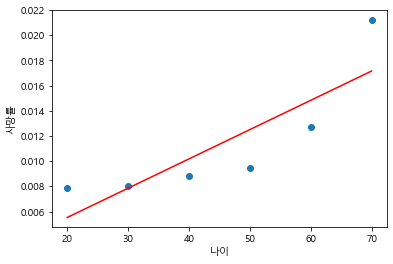

In [12]:
plt.scatter(x, death_rate)
plt.xlabel("나이")
plt.ylabel("사망률")
LeastSquareMethod(x, death_rate)

# 02 면허 취득경과년수 관련 데이터 분석

In [13]:
df = pd.read_excel('Data/면허취득_경과년별_교통사고.xls', header = 8)
df = df.drop('5년미만', axis=1)
df.columns = ['면허취득경과년수', '사고, 사망, 부상', 'Count']

In [14]:
df = df.drop(15).drop(16).drop(17).drop(21).drop(22).drop(23).drop(27).drop(28).drop(29).drop(33).drop(34).drop(35)

In [15]:
x = [0,1,2,3,4,5,10,15]
accident = []
death = []
injury = []
license_count = []
for i in range(int(len(df)/3)):
    accident.append(df.iloc[i*3, 2])
    death.append(df.iloc[i*3 + 1, 2])
    injury.append(df.iloc[i*3 + 2, 2])

In [16]:
df = pd.read_excel("Data/연도별_운전면허소지자현황.xls")

In [17]:
license_count.append(df.iloc[0]['2018'] - df.iloc[0]['2017'])
license_count.append(df.iloc[0]['2017'] - df.iloc[0]['2016'])
license_count.append(df.iloc[0]['2016'] - df.iloc[0]['2015'])
license_count.append(df.iloc[0]['2015'] - df.iloc[0]['2014'])
license_count.append(df.iloc[0]['2014'] - df.iloc[0]['2013'])
license_count.append(df.iloc[0]['2013'] - df.iloc[0]['2008'])
license_count.append(df.iloc[0]['2008'] - df.iloc[0]['2003'])
license_count.append(df.iloc[0]['2003'])

In [18]:
pd.DataFrame({'운전자수' : license_count}, index = ['0년', '1년', '2년', '3년', '4년', '5~9년', '10~14년', '15년이상'])

,운전자수
0년,495688
1년,475034
2년,896738
3년,749376
4년,696205
5~9년,3579661
10~14년,3205922
15년이상,22062457


In [19]:
accident_rate = []
death_rate = []
injury_rate = []
accident_rate = np.array(accident) / np.array(license_count)
death_rate = np.array(death) / (np.array(death) + np.array(injury))
injury_rate = np.array(injury) / (np.array(death) + np.array(injury))


In [20]:
year_accident_df = pd.DataFrame({'year' : x, 'accident_rate' : accident_rate})

m1 = ols ( 'year~accident_rate', data=year_accident_df).fit()
m1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     2.091
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.198
Time:                        03:55:35   Log-Likelihood:                -22.609
No. Observations:                   8   AIC:                             49.22
Df Residuals:                       6   BIC:                             49.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        15.1494      7.214      2.100      0.080      -2.502      32.801
accident_rate -1354.3623    936.548     -1.446      0.198   -3646.012     937.288
==============================================================================
Omnibus:                        3.340   Durbin-Watson:                   0.584
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                0.930
Skew:                           0.831   Prob(JB):                        0.628
Kurtosis:                       3.158   Cond. No.                         562.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

slope :  -0.00019083513233745744 intercept :  0.008448063361580133


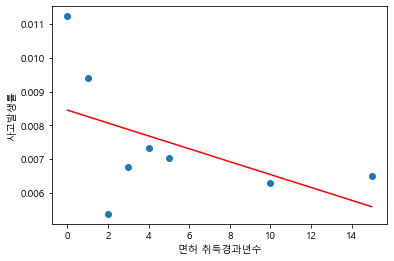

In [21]:
plt.scatter(x, accident_rate, label = 'accident rate')
plt.xlabel("면허 취득경과년수")
plt.ylabel("사고발생률")
LeastSquareMethod(x, accident_rate)

In [22]:
year_death_df = pd.DataFrame({'year' : x, 'death_rate' : death_rate})

m1 = ols ( 'year~death_rate', data=year_death_df).fit()
m1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     8.466
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0270
Time:                        03:55:35   Log-Likelihood:                -20.285
No. Observations:                   8   AIC:                             44.57
Df Residuals:                       6   BIC:                             44.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.5115     11.243     -2.447      0.050     -55.022      -0.001
death_rate  3854.7501   1324.795      2.910      0.027     613.094    7096.406
==============================================================================
Omnibus:                        0.274   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.872   Jarque-Bera (JB):                0.157
Skew:                          -0.219   Prob(JB):                        0.925
Kurtosis:                       2.472   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

slope :  0.00015182405833307597 intercept :  0.00767501618416129


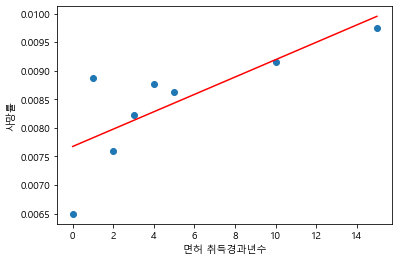

In [23]:
plt.scatter(x, death_rate, label = 'death rate')
plt.xlabel("면허 취득경과년수")
plt.ylabel("사망률")
LeastSquareMethod(x, death_rate)

# 03 날씨 관련 데이터 분석

In [24]:

df = pd.read_excel("Data/일자별_시도별 교통사고.xls", header=1)

month_list = []
month_list.append(df.iloc[0][4:])
month_list.append(df.iloc[3][4:])
month_list.append(df.iloc[6][4:])
month_list.append(df.iloc[9][4:])
month_list.append(df.iloc[12][4:])
month_list.append(df.iloc[15][4:])
month_list.append(df.iloc[18][4:])
month_list.append(df.iloc[21][4:])
month_list.append(df.iloc[24][4:])
month_list.append(df.iloc[27][4:])
month_list.append(df.iloc[30][4:])
month_list.append(df.iloc[33][4:])

In [25]:
day_list = []
for month in month_list:
    for day in month:
        if(day != '-'):
            day_list.append(day)

In [26]:
df = pd.read_csv("Data/서울 날씨통계.csv", encoding = 'ANSI')
df['교통사고_발생건수'] = day_list

In [27]:
weather = []
for i in range(len(df)):
    if(df.iloc[i]['일 최심적설(cm)'] >= 0):
        weather.append("눈")
    elif(df.iloc[i]['일강수량(mm)'] >= 0):
        weather.append('비')
    else:
        weather.append("맑음")
df['날씨'] = weather
df

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),안개 계속시간(hr),교통사고_발생건수,날씨
0,108,2019-01-01,-5.0,-8.2,631,-0.6,1525,NaN,NaN,NaN,...,6.1,9.1,14.9,17.1,1.0,1.4,NaN,NaN,62.0,맑음
1,108,2019-01-02,-4.9,-8.8,802,0.2,1458,NaN,NaN,NaN,...,5.9,8.9,14.7,17.1,1.3,1.9,NaN,NaN,96.0,맑음
2,108,2019-01-03,-3.5,-8.4,726,3.2,1436,NaN,NaN,NaN,...,5.8,8.8,14.7,17.0,1.4,2.0,NaN,NaN,102.0,맑음
3,108,2019-01-04,-1.1,-6.2,757,4.1,1504,NaN,NaN,NaN,...,5.7,8.7,14.5,17.0,0.9,1.3,NaN,NaN,100.0,맑음
4,108,2019-01-05,-2.8,-5.5,2358,1.1,1521,NaN,NaN,NaN,...,5.5,8.6,14.5,16.9,1.4,2.0,NaN,NaN,95.0,맑음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,108,2019-12-27,-1.7,-4.6,724,2.6,1442,NaN,NaN,NaN,...,7.8,10.5,15.8,17.2,1.5,2.2,NaN,NaN,94.0,맑음
361,108,2019-12-28,1.1,-3.6,336,6.1,1347,NaN,NaN,NaN,...,7.6,10.3,15.6,17.1,1.4,2.0,NaN,NaN,94.0,맑음
362,108,2019-12-29,3.8,1.1,43,6.2,1525,6.75,NaN,NaN,...,7.5,10.2,15.6,17.2,1.1,1.6,1.5,NaN,78.0,비
363,108,2019-12-30,2.7,-5.7,2359,6.8,1131,5.08,NaN,NaN,...,7.3,10.0,15.5,17.1,0.9,1.3,0.3,NaN,91.0,비


In [28]:
model=ols('교통사고_발생건수~weather', df).fit()

print (anova_lm(model))

             df         sum_sq     mean_sq         F    PR(>F)
weather     2.0    1265.301765  632.650882  1.567653  0.209946
Residual  362.0  146090.796866  403.565737       NaN       NaN


In [29]:
sunny_day = df[df['날씨'] == '맑음']
rainy_day = df[df['날씨'] == '비']
snowy_day = df[df['날씨'] == '눈']

In [30]:
sunny_day_accident_rate = sunny_day['교통사고_발생건수'].sum() / len(sunny_day)
rainy_day_accident_rate = rainy_day['교통사고_발생건수'].sum() / len(rainy_day)
snowy_day_accident_rate = snowy_day['교통사고_발생건수'].sum() / len(snowy_day)

print(sunny_day_accident_rate, rainy_day_accident_rate, snowy_day_accident_rate)

106.93805309734513 109.23664122137404 97.5


In [31]:
rainy_day[['일강수량(mm)', '교통사고_발생건수']].corr()

,일강수량(mm),교통사고_발생건수
일강수량(mm),1.000000,0.225958
교통사고_발생건수,0.225958,1.000000


In [32]:
snowy_day[['일 최심적설(cm)', '교통사고_발생건수']].corr()

,일 최심적설(cm),교통사고_발생건수
일 최심적설(cm),1.000000,-0.020895
교통사고_발생건수,-0.020895,1.000000


slope :  0.3674610099075918 intercept :  106.75866369349339


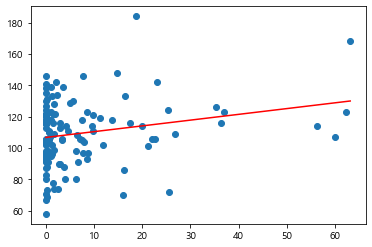

In [33]:
plt.scatter("일강수량(mm)", "교통사고_발생건수", data = rainy_day)
LeastSquareMethod(rainy_day['일강수량(mm)'], rainy_day['교통사고_발생건수'])

slope :  -0.32110091743119235 intercept :  97.78899082568807


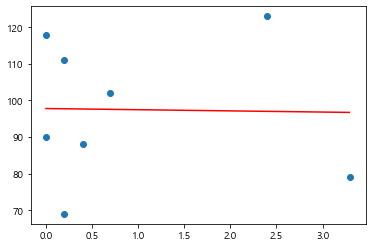

In [35]:
plt.scatter("일 최심적설(cm)", "교통사고_발생건수", data = snowy_day)
LeastSquareMethod(snowy_day['일 최심적설(cm)'], snowy_day['교통사고_발생건수'])

             df         sum_sq     mean_sq         F    PR(>F)
날씨          2.0    1265.301765  632.650882  1.567653  0.209946
Residual  362.0  146090.796866  403.565737       NaN       NaN


<AxesSubplot:xlabel='날씨', ylabel='교통사고_발생건수'>

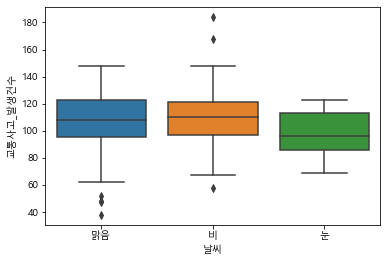

In [36]:
model=ols('교통사고_발생건수~날씨', df).fit()

print (anova_lm(model))
sns.boxplot(x='날씨', y='교통사고_발생건수', data = df)

# 04 차량 관련 데이터 분석

In [37]:
bus_count_df = pd.read_excel("Data/버스 등록대수.xls", header = 1)
bus_count_df
taxi_count_df = pd.read_excel("Data/택시대수 및 운전자 현황(2019.12).xls", header = 3)
bt_accident_df = pd.read_csv("Data/도로교통공단_가해운전자 차량용도별 월별 교통사고 통계_20191231.csv", encoding = "ANSI")

In [57]:
bus_count_df

,구분(1),업체수,보유대수,종사자수,노선수,면허대수
0,합계,980,51873,99253,17896,52254
1,시내버스,386,34608,71114,7613,34776
2,농어촌버스,109,2054,4081,5197,2035
3,마을버스,408,5032,3782,1408,4965
4,시외버스,69,8305,16311,3335,8597
5,고속버스,8,1874,3965,343,1881


In [58]:
bt_accident_df

,가해자차량용도_대분류,가해자차량용도_중분류,가해자차량용도,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,사업용,노선버스,시내버스,1,373,7,153,347,43
1,사업용,노선버스,시내버스,2,330,2,150,351,42
2,사업용,노선버스,시내버스,3,438,2,162,378,39
3,사업용,노선버스,시내버스,4,463,7,139,464,61
4,사업용,노선버스,시내버스,5,475,2,161,473,43
...,...,...,...,...,...,...,...,...,...
317,불명,불명,불명,8,301,0,40,217,89
318,불명,불명,불명,9,344,0,45,216,118
319,불명,불명,불명,10,368,0,61,260,86
320,불명,불명,불명,11,405,0,51,307,96


In [38]:
taxi_x = ['일반택시', '개인택시']
taxi_count = [taxi_count_df.iloc[40, 9], taxi_count_df.iloc[40, 16]]
bus_x = ['시내버스', '시외버스', '고속버스', '마을버스']
bus_count = [bus_count_df.iloc[1]['보유대수'], bus_count_df.iloc[4]['보유대수'], bus_count_df.iloc[5]['보유대수'], bus_count_df.iloc[3]['보유대수']]

In [39]:
시내버스_accident_month = []
시외버스_accident_month = []
고속버스_accident_month = []
마을버스_accident_month = []
일반택시_accident_month = []
개인택시_accident_month = []

시내버스_death_month = []
시외버스_death_month = []
고속버스_death_month = []
마을버스_death_month = []
일반택시_death_month = []
개인택시_death_month = []
    
시내버스_injury_month = []
시외버스_injury_month = []
고속버스_injury_month = []
마을버스_injury_month = []
일반택시_injury_month = []
개인택시_injury_month = []

for i in range(12):
    시내버스_accident_month.append(int(bt_accident_df.iloc[i,4]))
    시외버스_accident_month.append(int(bt_accident_df.iloc[i+12,4]))
    고속버스_accident_month.append(int(bt_accident_df.iloc[i+24,4]))
    마을버스_accident_month.append(int(bt_accident_df.iloc[i+36,4]))
    일반택시_accident_month.append(int(bt_accident_df.iloc[i+65,4]))
    개인택시_accident_month.append(int(bt_accident_df.iloc[i+77,4]))
    
    시내버스_death_month.append(bt_accident_df.iloc[i,5])
    시외버스_death_month.append(bt_accident_df.iloc[i+12,5])
    고속버스_death_month.append(bt_accident_df.iloc[i+24,5])
    마을버스_death_month.append(bt_accident_df.iloc[i+36,5])
    일반택시_death_month.append(bt_accident_df.iloc[i+65,5])
    개인택시_death_month.append(bt_accident_df.iloc[i+77,5])
    
    시내버스_injury_month.append(bt_accident_df.iloc[i,6] + bt_accident_df.iloc[i,7])
    시외버스_injury_month.append(bt_accident_df.iloc[i+12,6] + bt_accident_df.iloc[i+12,7])
    고속버스_injury_month.append(bt_accident_df.iloc[i+24,6] + bt_accident_df.iloc[i+24,7])
    마을버스_injury_month.append(bt_accident_df.iloc[i+36,6] + bt_accident_df.iloc[i+36,7])
    일반택시_injury_month.append(bt_accident_df.iloc[i+65,6] + bt_accident_df.iloc[i+65,7])
    개인택시_injury_month.append(bt_accident_df.iloc[i+77,6] + bt_accident_df.iloc[i+77,7])


In [40]:
car_accident_df = pd.read_excel("Data/차종별 교통사고.xls", header = 1)
car_count_df = pd.read_csv("Data/차량 등록수.csv", encoding = 'ANSI')

In [41]:
car_accident_df

,가해운전자 차종별,사고년도,합계,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
0,합계,사고건수,229600.0,16552.0,14752.0,18133.0,19104.0,20779.0,18968.0,19234.0,19992.0,19331.0,21690.0,21517.0,19548.0
1,합계,사망자수,3349.0,296.0,203.0,252.0,286.0,305.0,279.0,241.0,253.0,287.0,337.0,297.0,313.0
2,합계,부상자수,341712.0,24269.0,22612.0,26908.0,28438.0,31077.0,28315.0,28353.0,30358.0,28746.0,32050.0,31623.0,28963.0
3,승용차,사고건수,151365.0,11270.0,10185.0,12163.0,12597.0,13388.0,12252.0,12486.0,12892.0,12628.0,14037.0,14260.0,13207.0
4,승용차,사망자수,1571.0,157.0,116.0,115.0,131.0,145.0,117.0,97.0,119.0,126.0,160.0,144.0,144.0
5,승용차,부상자수,232408.0,17063.0,16149.0,18608.0,19252.0,20775.0,18922.0,19176.0,20172.0,19404.0,21366.0,21422.0,20099.0
6,승합차,사고건수,14221.0,1008.0,859.0,1168.0,1189.0,1285.0,1150.0,1164.0,1259.0,1210.0,1400.0,1302.0,1227.0
7,승합차,사망자수,209.0,15.0,12.0,11.0,21.0,17.0,18.0,21.0,11.0,22.0,19.0,19.0,23.0
8,승합차,부상자수,22675.0,1584.0,1387.0,1794.0,1937.0,2001.0,1818.0,1710.0,2071.0,1985.0,2295.0,2103.0,1990.0
9,화물차,사고건수,28788.0,2165.0,1797.0,2285.0,2430.0,2636.0,2357.0,2403.0,2497.0,2356.0,2801.0,2614.0,2447.0


In [42]:
car_count_df

,시도,시군구,레벨01,항목,단위,2019. 12 월,Unnamed: 6
0,서울,계,승용,계,NaN,2670803,NaN
1,서울,계,승합,계,NaN,114310,NaN
2,서울,계,화물,계,NaN,330840,NaN
3,서울,계,특수,계,NaN,8204,NaN
4,서울,계,총계,계,NaN,3124157,NaN
...,...,...,...,...,...,...,...
1335,제주,제주시,승용,계,NaN,422453,NaN
1336,제주,제주시,승합,계,NaN,16060,NaN
1337,제주,제주시,화물,계,NaN,51772,NaN
1338,제주,제주시,특수,계,NaN,1027,NaN


In [43]:
car_count_group = car_count_df.groupby("레벨01").sum()
car_count = [car_count_group.iloc[0, 1], car_count_group.iloc[1, 1], car_count_group.iloc[3, 1], car_count_group.iloc[4, 1]]
car_count

[38355034, 1623598, 190928, 7185172]

In [44]:
승용차_accident_month = []
승합차_accident_month = []
화물차_accident_month = []
특수차_accident_month = []

승용차_death_month = []
승합차_death_month = []
화물차_death_month = []
특수차_death_month = []

승용차_injury_month = []
승합차_injury_month = []
화물차_injury_month = []
특수차_injury_month = []

for i in range(12):
    승용차_accident_month.append(car_accident_df.iloc[3, 3+i])
    승합차_accident_month.append(car_accident_df.iloc[6, 3+i])
    화물차_accident_month.append(car_accident_df.iloc[9, 3+i])
    특수차_accident_month.append(car_accident_df.iloc[12, 3+i])
    
    승용차_death_month.append(car_accident_df.iloc[4, 3+i])
    승합차_death_month.append(car_accident_df.iloc[7, 3+i])
    화물차_death_month.append(car_accident_df.iloc[10, 3+i])
    특수차_death_month.append(car_accident_df.iloc[13, 3+i])
    
    승용차_injury_month.append(car_accident_df.iloc[5, 3+i])
    승합차_injury_month.append(car_accident_df.iloc[8, 3+i])
    화물차_injury_month.append(car_accident_df.iloc[11, 3+i])
    특수차_injury_month.append(car_accident_df.iloc[14, 3+i])


In [45]:
car_x = ['승용차', '승합차', '화물차', '특수차']
car_x.extend(bus_x)
car_x.extend(taxi_x)
car_x

['승용차', '승합차', '화물차', '특수차', '시내버스', '시외버스', '고속버스', '마을버스', '일반택시', '개인택시']

In [46]:
car_count.extend(bus_count)
car_count.extend(taxi_count)
car_count
pd.DataFrame(car_count, index = car_x, columns = ['등록대수'])

,등록대수
승용차,38355034
승합차,1623598
화물차,190928
특수차,7185172
시내버스,34608
시외버스,8305
고속버스,1874
마을버스,5032
일반택시,79287
개인택시,164625


In [47]:
car_accident_df = pd.DataFrame(columns = ['월', '차종', '사고발생수', '사망자수', '부상자수', '사고발생률', '사망률'])
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['승용차', '승용차', '승용차', '승용차', '승용차', '승용차', '승용차', '승용차', '승용차', '승용차', '승용차', '승용차'], '사고발생수' : 승용차_accident_month, '사망자수' : 승용차_death_month, '부상자수' : 승용차_injury_month, '사고발생률' : np.array(승용차_accident_month) / car_count[0], '사망률' : np.array(승용차_death_month) / (np.array(승용차_death_month) + np.array(승용차_injury_month))}))
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['승합차', '승합차', '승합차', '승합차', '승합차', '승합차', '승합차', '승합차', '승합차', '승합차', '승합차', '승합차'], '사고발생수' : 승합차_accident_month, '사망자수' : 승합차_death_month, '부상자수' : 승합차_injury_month, '사고발생률' : np.array(승합차_accident_month) / car_count[1], '사망률' : np.array(승합차_death_month) / (np.array(승합차_death_month) + np.array(승합차_injury_month))}), ignore_index = True)
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['화물차', '화물차', '화물차', '화물차', '화물차', '화물차', '화물차', '화물차', '화물차', '화물차', '화물차', '화물차'], '사고발생수' : 화물차_accident_month, '사망자수' : 화물차_death_month, '부상자수' : 화물차_injury_month, '사고발생률' : np.array(화물차_accident_month) / car_count[2], '사망률' : np.array(화물차_death_month) / (np.array(화물차_death_month) + np.array(화물차_injury_month))}), ignore_index = True)
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['특수차', '특수차', '특수차', '특수차', '특수차', '특수차', '특수차', '특수차', '특수차', '특수차', '특수차', '특수차'], '사고발생수' : 특수차_accident_month, '사망자수' : 특수차_death_month, '부상자수' : 특수차_injury_month, '사고발생률' : np.array(특수차_accident_month) / car_count[3], '사망률' : np.array(특수차_death_month) / (np.array(특수차_death_month) + np.array(특수차_injury_month))}), ignore_index = True)
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['시내버스', '시내버스', '시내버스', '시내버스', '시내버스', '시내버스', '시내버스', '시내버스', '시내버스', '시내버스', '시내버스', '시내버스'], '사고발생수' : 시내버스_accident_month, '사망자수' : 시내버스_death_month, '부상자수' : 시내버스_injury_month, '사고발생률' : np.array(시내버스_accident_month) / car_count[4], '사망률' : np.array(시내버스_death_month) / (np.array(시내버스_death_month) + np.array(시내버스_injury_month))}), ignore_index = True)
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['시외버스', '시외버스', '시외버스', '시외버스', '시외버스', '시외버스', '시외버스', '시외버스', '시외버스', '시외버스', '시외버스', '시외버스'], '사고발생수' : 시외버스_accident_month, '사망자수' : 시외버스_death_month, '부상자수' : 시외버스_injury_month, '사고발생률' : np.array(시외버스_accident_month) / car_count[5], '사망률' : np.array(시외버스_death_month) / (np.array(시외버스_death_month) + np.array(시외버스_injury_month))}), ignore_index = True)
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['고속버스', '고속버스', '고속버스', '고속버스', '고속버스', '고속버스', '고속버스', '고속버스', '고속버스', '고속버스', '고속버스', '고속버스'], '사고발생수' : 고속버스_accident_month, '사망자수' : 고속버스_death_month, '부상자수' : 고속버스_injury_month, '사고발생률' : np.array(고속버스_accident_month) / car_count[6], '사망률' : np.array(고속버스_death_month) / (np.array(고속버스_death_month) + np.array(고속버스_injury_month))}), ignore_index = True)
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['마을버스', '마을버스', '마을버스', '마을버스', '마을버스', '마을버스', '마을버스', '마을버스', '마을버스', '마을버스', '마을버스', '마을버스'], '사고발생수' : 마을버스_accident_month, '사망자수' : 마을버스_death_month, '부상자수' : 마을버스_injury_month, '사고발생률' : np.array(마을버스_accident_month) / car_count[7], '사망률' : np.array(마을버스_death_month) / (np.array(마을버스_death_month) + np.array(마을버스_injury_month))}), ignore_index = True)
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['일반택시', '일반택시', '일반택시', '일반택시', '일반택시', '일반택시', '일반택시', '일반택시', '일반택시', '일반택시', '일반택시', '일반택시'], '사고발생수' : 일반택시_accident_month, '사망자수' : 일반택시_death_month, '부상자수' : 일반택시_injury_month, '사고발생률' : np.array(일반택시_accident_month) / car_count[8], '사망률' : np.array(일반택시_death_month) / (np.array(일반택시_death_month) + np.array(일반택시_injury_month))}), ignore_index = True)
car_accident_df = car_accident_df.append(pd.DataFrame({'월' : [1,2,3,4,5,6,7,8,9,10,11,12], '차종' : ['개인택시', '개인택시', '개인택시', '개인택시', '개인택시', '개인택시', '개인택시', '개인택시', '개인택시', '개인택시', '개인택시', '개인택시'], '사고발생수' : 개인택시_accident_month, '사망자수' : 개인택시_death_month, '부상자수' : 개인택시_injury_month, '사고발생률' : np.array(개인택시_accident_month) / car_count[9], '사망률' : np.array(개인택시_death_month) / (np.array(개인택시_death_month) + np.array(개인택시_injury_month))}), ignore_index = True)


In [48]:
car_accident_df

,월,차종,사고발생수,사망자수,부상자수,사고발생률,사망률
0,1,승용차,11270.0,157.0,17063.0,0.000294,0.009117
1,2,승용차,10185.0,116.0,16149.0,0.000266,0.007132
2,3,승용차,12163.0,115.0,18608.0,0.000317,0.006142
3,4,승용차,12597.0,131.0,19252.0,0.000328,0.006758
4,5,승용차,13388.0,145.0,20775.0,0.000349,0.006931
...,...,...,...,...,...,...,...
115,8,개인택시,567.0,3.0,759.0,0.003444,0.003937
116,9,개인택시,538.0,7.0,746.0,0.003268,0.009296
117,10,개인택시,579.0,8.0,772.0,0.003517,0.010256
118,11,개인택시,584.0,6.0,767.0,0.003547,0.007762


In [49]:
model = ols('사고발생률~차종', car_accident_df).fit()

print (anova_lm(model))

             df    sum_sq   mean_sq          F        PR(>F)
차종          9.0  0.004785  0.000532  258.65132  1.019886e-69
Residual  110.0  0.000226  0.000002        NaN           NaN


In [50]:
model=ols('사망률~차종', car_accident_df).fit()

print (anova_lm(model))

             df    sum_sq   mean_sq         F        PR(>F)
차종          9.0  0.003122  0.000347  6.107656  6.179533e-07
Residual  110.0  0.006248  0.000057       NaN           NaN


In [51]:
accident_rate = car_accident_df.groupby("차종").사고발생률.mean()

In [52]:
death_rate = car_accident_df.groupby("차종").사망률.mean()

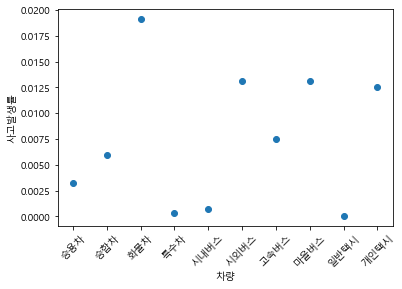

In [53]:
plt.xticks(rotation = 45)
plt.xlabel("차량")
plt.ylabel("사고발생률")
plt.scatter(x = car_x, y = accident_rate)

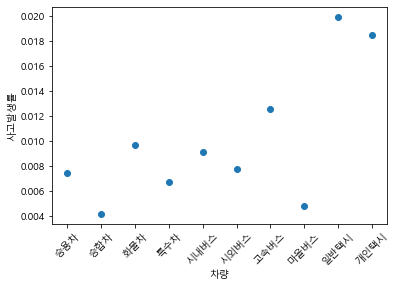

In [54]:
plt.xticks(rotation = 45)
plt.xlabel("차량")
plt.ylabel("사고발생률")
plt.scatter(x = car_x, y = death_rate)